# Dubrow and Divachi 2013
**TODO**: Describe experiment and the implementation of the simulations

**TODO**: Clean up this simluations and re-run simluations for inteligability


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from models import *
from tqdm import tnrange
from simulations.exp_dubrow import run_subject, generate_experiment

sns.set_context('paper', font_scale=1.5)

Using TensorFlow backend.


TensorFlow Version: 1.9.0
Keras      Version: 2.2.0
TensorFlow Check Passed


In [2]:
# SEM parameters
df0 = 1.
scale0 = .2

mode = df0 * scale0 / (df0 + 2)
print("Prior variance (mode): {}".format(mode))

lmda = 10.0  # stickyness parameter
alfa = 1.  # concentration parameter

f_class = GRUEvent
f_opts=dict(var_scale0=scale0, var_df0=df0)

# create the corrupted memory trace
# noise parameters
b = 2
tau = 0.1
print("tau: {}".format(tau))

# set the parameters for the Gibbs sampler
gibbs_kwargs = dict(
    memory_alpha = alfa,
    memory_lambda = lmda,
    memory_epsilon = np.exp(-20),
    b = b,  # re-defined here for completeness
    tau = tau,  # ibid
    n_samples = 250,
    n_burnin = 100,
#     n_chains = 3,
    progress_bar=False,
)
sem_kwargs = dict(lmda=lmda, alfa=alfa, f_class=f_class, f_opts=f_opts)

epsilon_e = 0.25

Prior variance (mode): 0.0666666666667
tau: 0.1


Prior variance (mode): 0.0666666666667
Median Feature variance: 0.0515606149675


Run SEM: 100%|██████████| 5/5 [00:05<00:00,  1.18s/it]

[0 1 2 3 4]


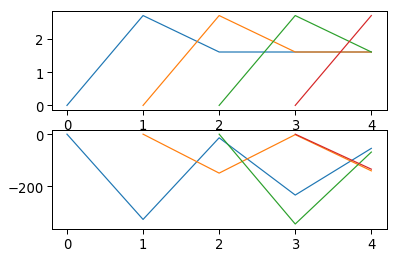

In [3]:
# spot-check the segementation ability

x_list_items, e_tokens = generate_experiment()

mode = df0 * scale0 / (df0 + 2)
print("Prior variance (mode): {}".format(mode))
print("Median Feature variance: {}".format(
    np.median(np.var(np.concatenate(x_list_items), axis=0))))

sem_kwargs = dict(
    lmda=lmda, alfa=alfa, f_class=f_class, f_opts=f_opts
)

sem = SEM(**sem_kwargs)
sem.run_w_boundaries(list_events=x_list_items)
print sem.results.e_hat

fig, axes = plt.subplots(2, 1)
axes[0].plot(sem.results.log_prior)
axes[1].plot(sem.results.log_like)
plt.show()

In [4]:
# # load saved simluations from memory
# from glob import glob
# n_batch = 25
# files = glob('simulations/saved_simulations/Dubrow_sim_*.pkl')
# results = pd.concat([pd.read_pickle(f) for f in files])


In [5]:
# uncomment to re-run simulations (takes about a day)

n_batch = 25
n_runs = 16

results = []
for ii in range(n_batch):
    print "Beginning batch {} of {}\n".format(ii, n_batch)
    results.append(run_subject(
        sem_kwargs, gibbs_kwargs, epsilon_e, n_runs=n_runs, subj_n=ii))
results = pd.concat(results)


Running Subject:   0%|          | 0/16 [00:00<?, ?it/s]

Beginning batch 0 of 25



Running Subject:   6%|▋         | 1/16 [01:32<23:01, 92.11s/it]/Users/nicholasfranklin/anaconda3/envs/sem/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/nicholasfranklin/anaconda3/envs/sem/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Running Subject:   0%|          | 0/16 [00:00<?, ?it/s]

Beginning batch 1 of 25



Running Subject:   0%|          | 0/16 [00:00<?, ?it/s]

Beginning batch 2 of 25



Running Subject:   0%|          | 0/16 [00:00<?, ?it/s]

Beginning batch 3 of 25



Running Subject:   0%|          | 0/16 [00:00<?, ?it/s]

Beginning batch 4 of 25



Running Subject:   0%|          | 0/16 [00:00<?, ?it/s]

Beginning batch 5 of 25



Running Subject:   0%|          | 0/16 [00:00<?, ?it/s]

Beginning batch 6 of 25



Running Subject:   0%|          | 0/16 [00:00<?, ?it/s]

Beginning batch 7 of 25



Running Subject:   0%|          | 0/16 [00:00<?, ?it/s]

Beginning batch 8 of 25



Running Subject:   0%|          | 0/16 [00:00<?, ?it/s]

Beginning batch 9 of 25



Running Subject:   0%|          | 0/16 [00:00<?, ?it/s]

Beginning batch 10 of 25



Running Subject:   0%|          | 0/16 [00:00<?, ?it/s]

Beginning batch 11 of 25



Running Subject:   0%|          | 0/16 [00:00<?, ?it/s]

Beginning batch 12 of 25



Running Subject:   0%|          | 0/16 [00:00<?, ?it/s]

Beginning batch 13 of 25



Running Subject:   0%|          | 0/16 [00:00<?, ?it/s]

Beginning batch 14 of 25



Running Subject:   0%|          | 0/16 [00:00<?, ?it/s]

Beginning batch 15 of 25



Running Subject:   0%|          | 0/16 [00:00<?, ?it/s]

Beginning batch 16 of 25



Running Subject:   0%|          | 0/16 [00:00<?, ?it/s]

Beginning batch 17 of 25



Running Subject:   0%|          | 0/16 [00:00<?, ?it/s]

Beginning batch 18 of 25



Running Subject:   0%|          | 0/16 [00:00<?, ?it/s]

Beginning batch 19 of 25



Running Subject:   0%|          | 0/16 [00:00<?, ?it/s]

Beginning batch 20 of 25



Running Subject:   0%|          | 0/16 [00:00<?, ?it/s]

Beginning batch 21 of 25



Running Subject:   0%|          | 0/16 [00:00<?, ?it/s]

Beginning batch 22 of 25



Running Subject:   0%|          | 0/16 [00:00<?, ?it/s]

Beginning batch 23 of 25



Running Subject:   0%|          | 0/16 [00:00<?, ?it/s]

Beginning batch 24 of 25



Running Subject: 100%|██████████| 16/16 [25:08<00:00, 97.81s/it]


In [6]:
y = [results.groupby('Subject').mean()['Transitions Boundary'],
     results.groupby('Subject').mean()['Transitions Pre-Boundary']]
from scipy.stats import ttest_1samp
ttest_1samp(y[0] - y[1], 0)



Ttest_1sampResult(statistic=-3.7181209446899817, pvalue=0.001070668681640594)

Ttest_1sampResult(statistic=-3.2251166012327457, pvalue=0.003613881068347618)


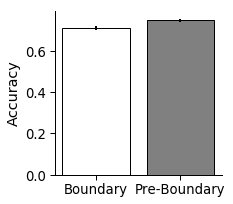

In [7]:
plt.figure(figsize=(3, 3))
x = ['Boundary', 'Pre-Boundary']
y = [results.groupby('Subject').mean()['Boundary'].mean(),
     results.groupby('Subject').mean()['Pre-Boundary'].mean()]
y_err = [results.groupby('Subject').mean()['Boundary'].std() / np.sqrt(n_batch),
     results.groupby('Subject').mean()['Pre-Boundary'].std() / np.sqrt(n_batch)]

plt.bar(x[0], y[0], lw=1, edgecolor='k', facecolor='w')
plt.bar(x[1], y[1], lw=1, edgecolor='k', facecolor='grey')
plt.errorbar(x, y, y_err, marker='None', lw=2, ls='None', c='k')
plt.ylabel('Accuracy')
sns.despine()

from scipy.stats import ttest_1samp
print ttest_1samp(results.groupby('Subject').mean()['Boundary'].values - 
                results.groupby('Subject').mean()['Pre-Boundary'].values, 0)

Ttest_1sampResult(statistic=-3.7181209446899817, pvalue=0.001070668681640594)


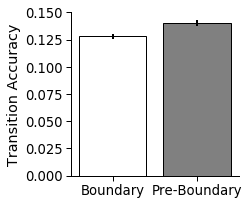

In [11]:
plt.figure(figsize=(3, 3))
x = ['Boundary', 'Pre-Boundary']
y = [results.groupby('Subject').mean()['Transitions Boundary'].mean(),
     results.groupby('Subject').mean()['Transitions Pre-Boundary'].mean()]
y_err = [results.groupby('Subject').mean()['Transitions Boundary'].std() / np.sqrt(n_batch),
     results.groupby('Subject').mean()['Transitions Pre-Boundary'].std() / np.sqrt(n_batch)]

plt.bar(x[0], y[0], lw=1, edgecolor='k', facecolor='w')
plt.bar(x[1], y[1], lw=1, edgecolor='k', facecolor='grey')
plt.errorbar(x, y, y_err, marker='None', lw=2, ls='None', c='k')
plt.ylabel('Transition Accuracy')
sns.despine()

from scipy.stats import ttest_1samp
print ttest_1samp(results.groupby('Subject').mean()['Transitions Boundary'].values - 
                results.groupby('Subject').mean()['Transitions Pre-Boundary'].values, 0)

plt.savefig('Dubrow_correct_transitions_GRU.png', dpi=300, bbox_inches='tight')

Ttest_1sampResult(statistic=-4.917157634153577, pvalue=5.128622992260036e-05)


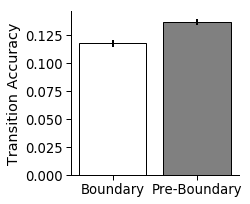

In [9]:
results_copy = results.copy()
results_copy.loc[results_copy['Transitions Boundary'].isnull(), 'Transitions Boundary'] = 0
results_copy.loc[results_copy['Transitions Pre-Boundary'].isnull(), 'Transitions Pre-Boundary'] = 0


plt.figure(figsize=(3, 3))
x = ['Boundary', 'Pre-Boundary']
y = [results_copy.groupby('Subject').mean()['Transitions Boundary'].mean(),
     results_copy.groupby('Subject').mean()['Transitions Pre-Boundary'].mean()]
y_err = [results_copy.groupby('Subject').mean()['Transitions Boundary'].std() / np.sqrt(n_batch),
     results_copy.groupby('Subject').mean()['Transitions Pre-Boundary'].std() / np.sqrt(n_batch)]

plt.bar(x[0], y[0], lw=1, edgecolor='k', facecolor='w')
plt.bar(x[1], y[1], lw=1, edgecolor='k', facecolor='grey')
plt.errorbar(x, y, y_err, marker='None', lw=2, ls='None', c='k')
plt.ylabel('Transition Accuracy')
sns.despine()

from scipy.stats import ttest_1samp
print ttest_1samp(results_copy.groupby('Subject').mean()['Transitions Boundary'].values - 
                results_copy.groupby('Subject').mean()['Transitions Pre-Boundary'].values, 0)

# plt.savefig('Dubrow_correct_transitions_GRU.png', dpi=300, bbox_inches='tight')

In [10]:
# the overall accuracy is low, this is something we may have to revisit

results_copy['Overall Acc'].mean()

0.7552334999999999